<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Stochastic_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stochastic Approximation**

Let $D = \{X_{i}: i \in \mathbb{N}\}$ be a data set of iid sequence from a random generator of distribution $\mathcal{N}(b, \sigma^{2})$ for some unknown parameters $b$ and $\sigma$. Our goal is to estimate $b$ using so called stochastic approximation (SA) with a given learning rate $\alpha \in (0, 1)$:

- initialize $b_{0}$
- iterate $b_{n+1} = b_{n} + \alpha (x_{n} - b_{n})$.

we want to examine the convergence $b_{n} \to b$. For simplicity, let's fix $\alpha = 0.01$.

- Write pseudocode for SA.
- Generate a data set $D = \{x_{i} : 1\leq i \leq 10000\}$ with $\mathcal{N}(1, 4)$.
- Write a code to implement SA on D, and demonstrate $b_{n} \to b$ as $n \to \infty$.
- Prove that $\lim_{n \to \infty} \mathbb{E}(b_{n}) = b$.
- Can you prove or disprove that $b_{n} \to b$ in $L^{2}$?

## **Solution:**

(1) The pseudocode is as follows:

[Pseudocode](https://github.com/JiaminJIAN/20MA573/blob/master/src/HW10_pesudocode.png)

(2) Generate a data set $D = \{x_{i} : 1\leq i \leq 10000\}$ with $\mathcal{N}(1, 4)$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline


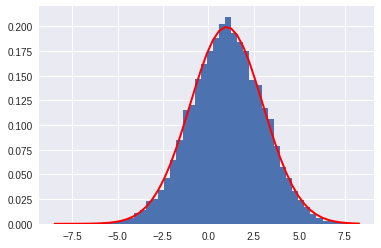

In [2]:
## Generate the data set D

mu = 1; sigma = 2
D = np.random.normal(mu, sigma, 10000)

count, bins, ignored = plt.hist(D, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

(3) Write a code to implement SA on D, and demonstrate $b_{n} \to b$ as $n \to \infty$.

In [7]:
## AS(mu,n)

def AS(mu_ture, n):
  alpha = 0.01
  mu = 0

  for i in range(n):
    x = np.random.normal(mu_ture, 2)
    b = mu
    mu = b + alpha * (x - b)

  return (mu)

mu_estimate = AS(1, 10000)
print("The estimator of mu by the stochastic approximation method is:")
print(mu_estimate)

The estimator of mu by the stochastic approximation method is:
1.0204444873826277


In [8]:
mu_record = []
mean_of_mu = []

for i in range(1000):
  mu_record.append(AS(1, 10000))
  mean_of_mu.append(np.mean(mu_record))

print("The estimator of mu by the stochastic approximation method is:")
print(mean_of_mu[-1])

The estimator of mu by the stochastic approximation method is:
0.996538431661924


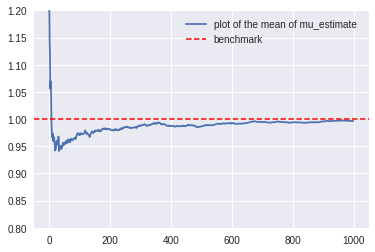

In [9]:
plt.plot(range(1000), mean_of_mu, label='plot of the mean of mu_estimate ')
plt.axhline(1, color='r', ls='dashed', lw=1.5, label='benchmark')
plt.ylim(0.8, 1.2)
plt.legend()

(4) Prove that $\lim_{n \to \infty} \mathbb{E}(b_{n}) = b$.

**Proof:**

Since $b_{n+1} = b_{n} + \alpha (x_{n} - b_{n})$ and $x_{n} \sim \mathcal{N}(b, \sigma^{2})$, we have

$$b_{n+1} = (1 - \alpha) b_{n} + \alpha x_{n}.$$

Take expectation on the both side, we have

$$\mathbb{E}(b_{n+1}) = (1 - \alpha) \mathbb{E} (b_{n}) + \alpha \mathbb{E}(x_{n}),$$

then we have

$$\mathbb{E}(b_{n+1}) = (1 - \alpha) \mathbb{E} (b_{n}) + \alpha b.$$

We denote $x = \lim_{n \to \infty} \mathbb{E} (b_{n})$, then we can get

$$x = (1 - \alpha) x + \alpha b,$$

thus we know that $x = \lim_{n \to \infty} \mathbb{E} (b_{n}) = b$.


(5) Can you prove or disprove that $b_{n} \to b$ in $L^{2}$?

**Proof:**

The sequence $b_{n}$ doesn't converges to $b$ in $L^{2}$.

Since $b_{0} = 0$ and $b_{n+1} = (1 - \alpha) b_{n} + \alpha x_{n}$, by mathematic induction, we know that

$$b_{n} = \sum_{k = 0}^{n - 1} (1 - \alpha)^{n - k - 1} \alpha x_{k} ,$$

as the sequence $\{x_{n}\}$  is iid of $\mathcal{N}(b, \sigma^{2})$, the variance of $b_{n}$ is

$$var(b_{n}) = \sigma^{2} \alpha^{2} \sum_{k = 0}^{n - 1} (1 - \alpha)^{2(n - k - 1)}  = \sigma^{2} \alpha^{2} \sum_{k = 0}^{n - 1} (1 - \alpha)^{2 k} = \sigma^{2} \alpha^{2} \frac{1 - (1 - \alpha)^{2n}}{1 - (1 - \alpha)^{2}}.$$

As $\alpha \in (0, 1)$, when $n \to \infty$, we have

$$\lim_{n \to \infty} var(b_{n}) = \frac{\sigma^{2} \alpha}{2 - \alpha}.$$

We prove the statement that the sequence $b_{n}$ does not converge to $b$ in $L^{2}$ by contradiction. If $b_{n}$ converges to $b$ in $L^{2}$, we have

$$\lim_{n \to \infty} \mathbb{E}[(b_{n} - b)^{2}] = 0.$$

Then we have

$$\lim_{n \to \infty} \mathbb{E} [(b_{n} - \mathbb{E}(b_{n}))^{2}] + \lim_{n \to \infty} (\mathbb{E}(b_{n}) - b)^{2}  = 0.$$

Since we have $\lim_{n \to \infty} \mathbb{E} (b_{n}) = b$, then if $b_{n}$ converges to $b$ in $L^{2}$, we have

$$\lim_{n \to \infty} \mathbb{E} [(b_{n} - \mathbb{E}(b_{n}))^{2}] = \lim_{n \to \infty} var(b_{n}) = 0, $$

which is contradictory with the fact

$$\lim_{n \to \infty} var(b_{n}) = \frac{\sigma^{2} \alpha}{2 - \alpha}.$$

Thus we know that the sequence $b_{n}$ doesn't converges to $b$ in $L^{2}$.